In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [48]:
ziru_df = pd.read_csv('ziru.csv')
ziru_df.head(n=1)
# 将已有数据导进来

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988


In [49]:
# 检查缺失值情况
ziru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [50]:
ziru_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [51]:
df = ziru_df.copy()
df['PerPrice'] = ziru_df['Price']/ziru_df['Size']
# 添加新特征房屋均价
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)
# 重新摆放列位置
df.head(n=1)

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.4,780.0


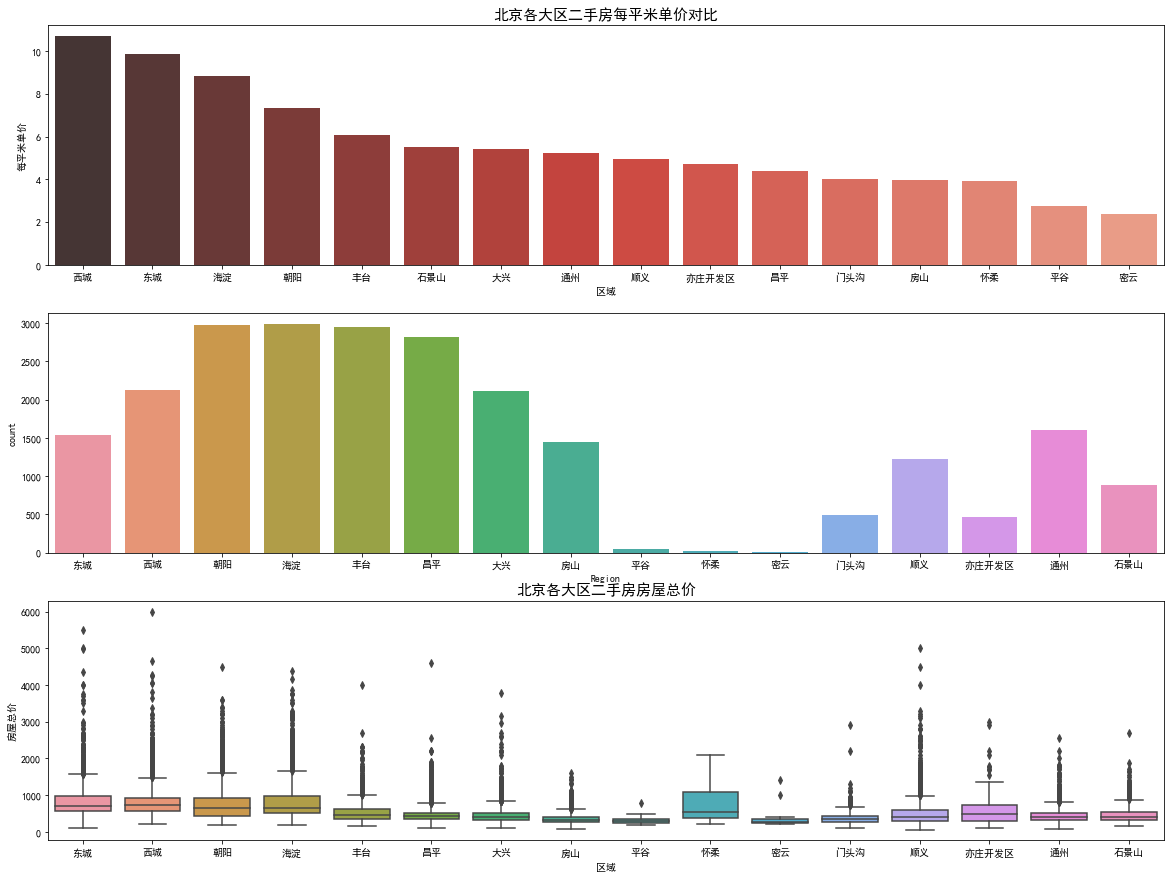

In [52]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='PerPrice', palette="Reds_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')


sns.countplot(df['Region'], ax=ax2)

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')
plt.show()



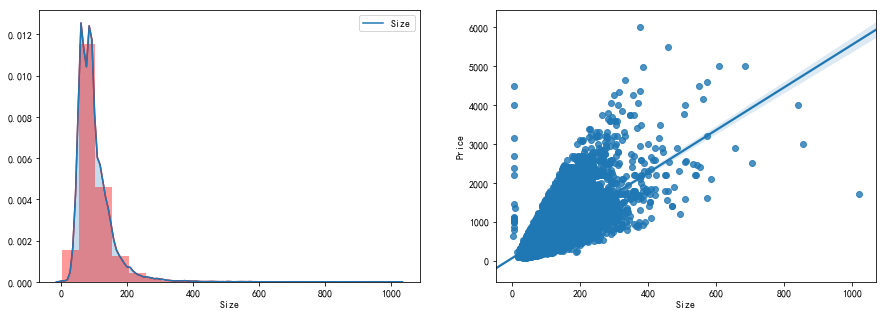

In [53]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 二手房的面积分布
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 二手房面积和价位的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

In [54]:
df.loc[df['Size']< 10]
# 查看size<10的样本

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


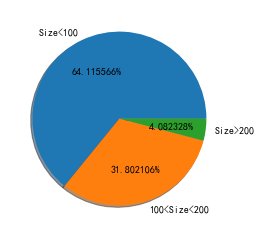

In [55]:
sizes=[len(df[df.Size<100]),len(df[(df.Size>100)&(df.Size<200)]),len(df[df.Size>200])]
labels=['Size<100' , '100<Size<200','Size>200']
plt.pie(sizes,labels= labels,autopct='%0f%%',shadow=True)
plt.show()
# 绘制饼图

In [56]:
df.loc[df['Size']>1000]
# 查看size>1000的样本

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


In [57]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]
df

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0
5,东城,广渠门,幸福家园二期,2室1厅,18,2003,111.0,有电梯,南北,其他,10.630631,1180.0
6,东城,西罗园,西革新里110号院,1室1厅,6,1992,42.0,无电梯,南,其他,7.595238,319.0
7,东城,西罗园,建予园,2室1厅,16,1999,105.0,有电梯,南,其他,6.095238,640.0
8,东城,东花市,富贵园一区,3室2厅,9,2003,161.0,有电梯,南北,精装,11.055901,1780.0
9,东城,东直门,万国城MOMA,2室2厅,25,2002,127.0,有电梯,东北,精装,10.236220,1300.0


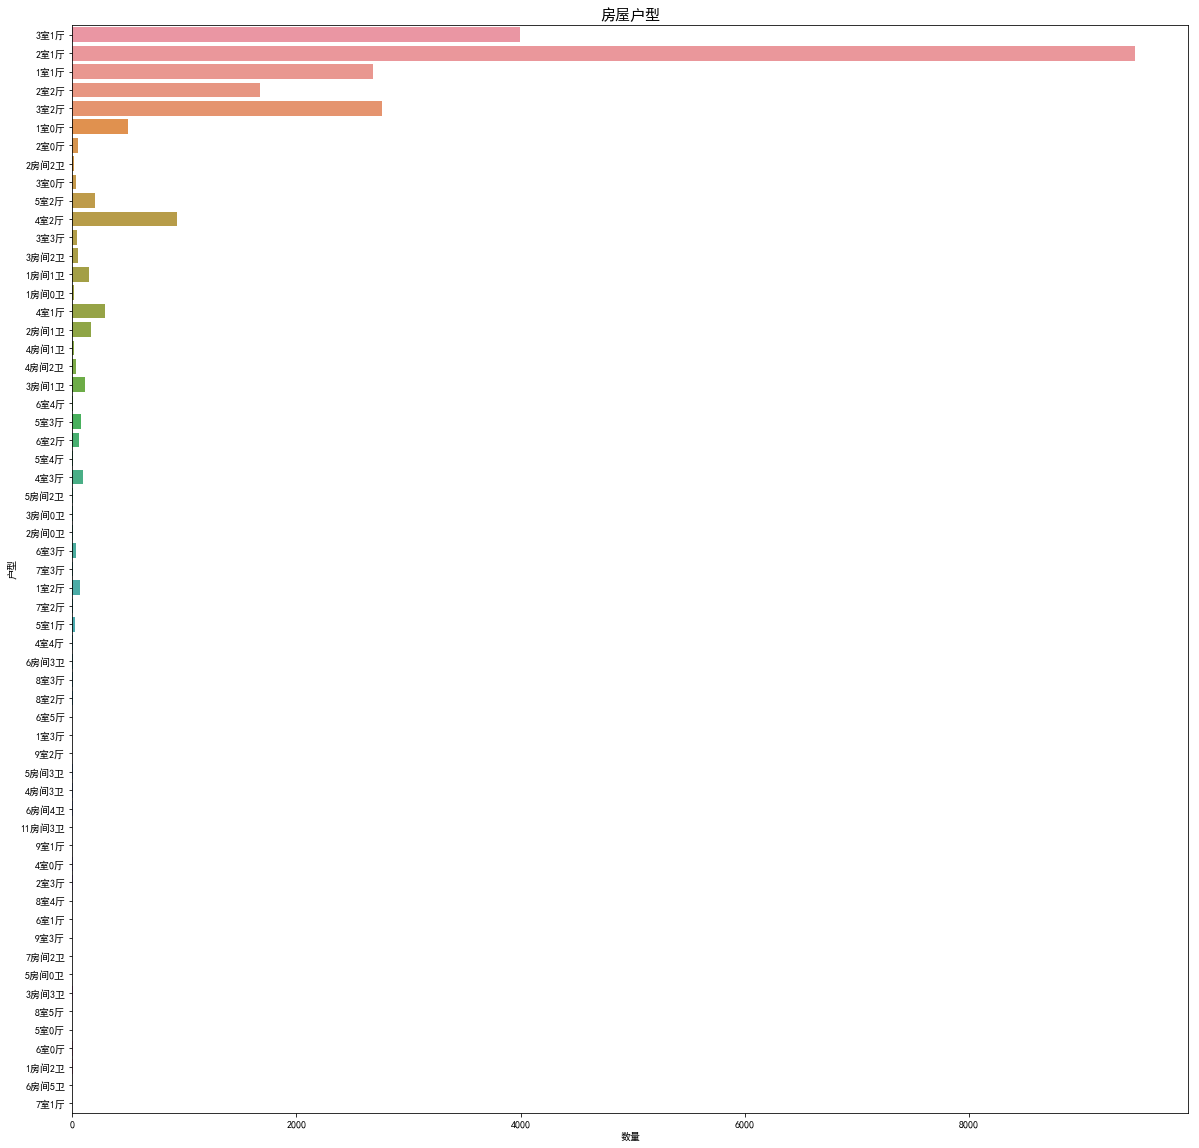

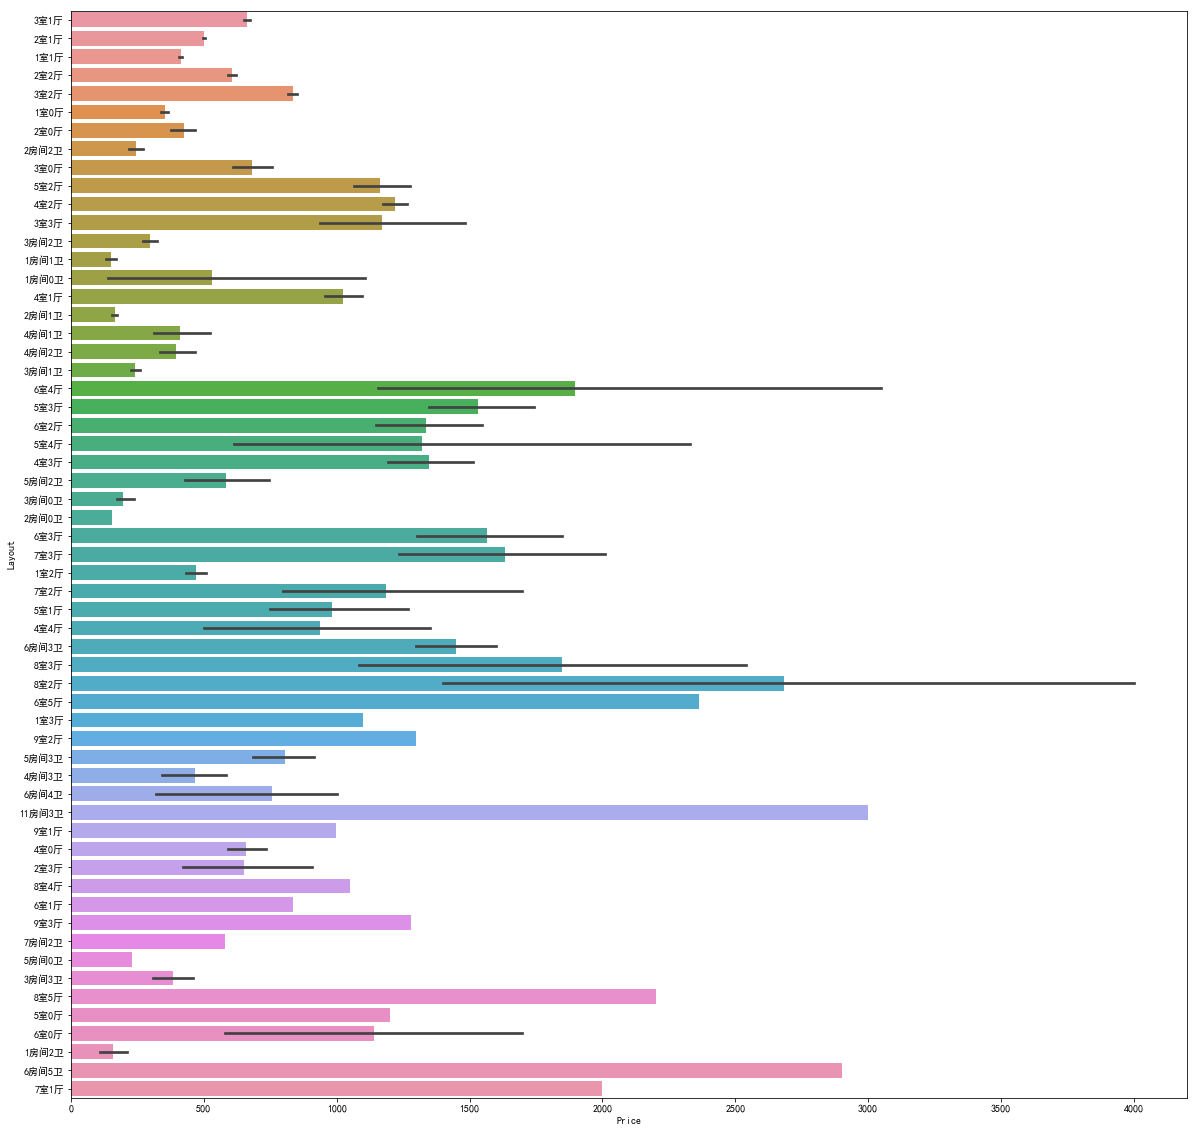

In [58]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
f, ax2= plt.subplots(figsize=(20,20))
sns.barplot(y='Layout', x='Price', data=df, ax=ax2)
plt.show()

In [59]:
df['Renovation'].value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

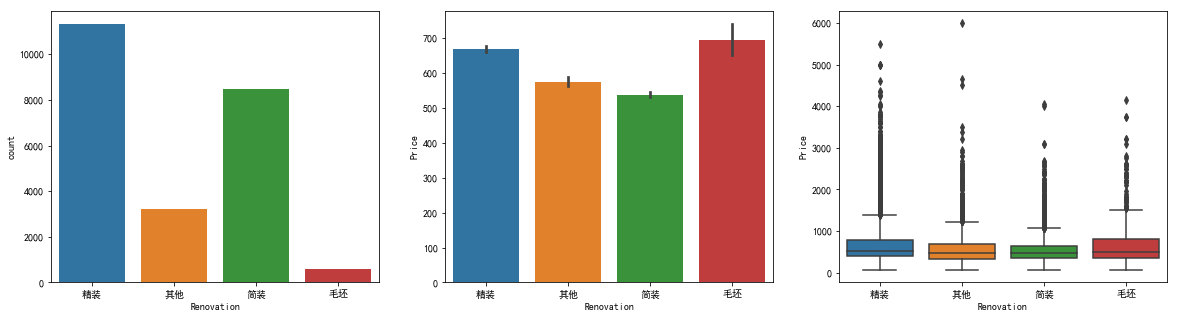

In [60]:
# 去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']

# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

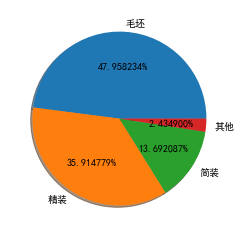

In [61]:
sizes=[len(df[df.Renovation=='精装']),len(df[df.Renovation=='简装']),len(df[df.Renovation=='其他']),len(df[df.Renovation=='毛坯'])]
labels=['毛坯','精装','简装','其他']
plt.pie(sizes,labels= labels,autopct='%0f%%',shadow=True)
plt.show()

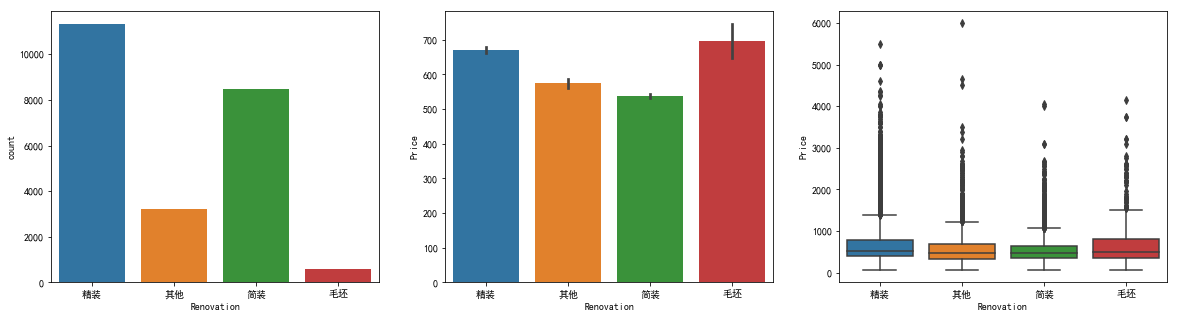

In [62]:
# 去掉错误数据“南北”，因为爬虫过程中一些信息位置为空，导致“Direction”的特征出现在这里，需要清除或替换
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']

# 画幅设置
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

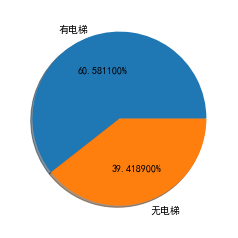

In [63]:
sizes=[len(df[df.Elevator=='有电梯']),len(df[df.Elevator=='无电梯'])]
labels=['有电梯' , '无电梯']
plt.pie(sizes,labels= labels,autopct='%0f%%',shadow=True)
plt.show()

In [64]:
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))


Elevator缺失值数量为：8237


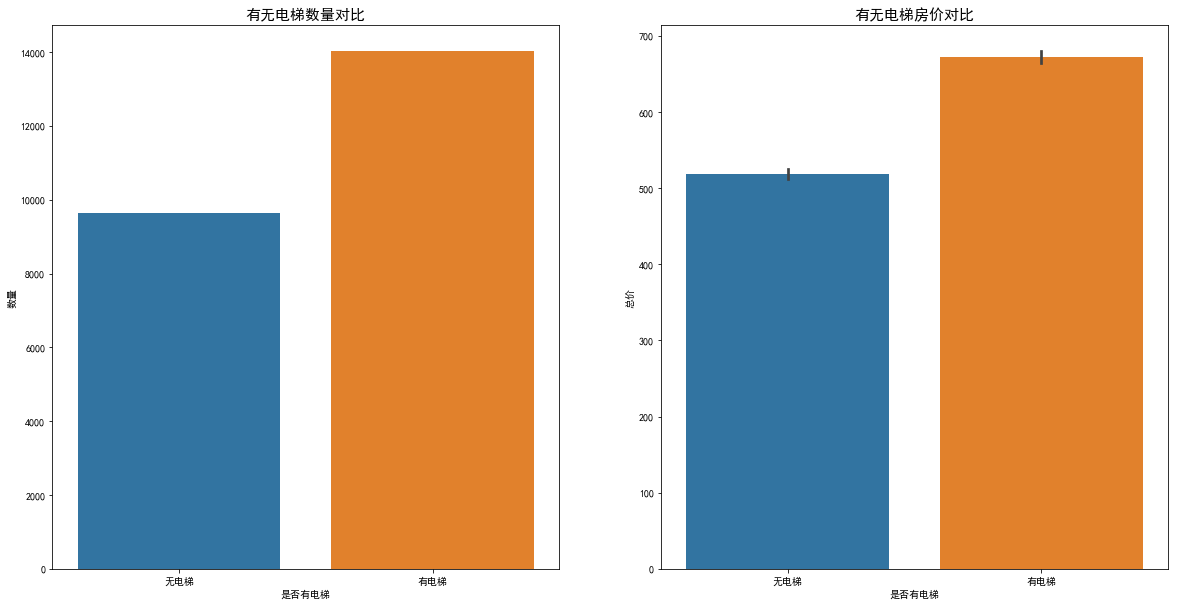

In [65]:
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']
# 填补Elevator缺失值,将楼层数大于6的设置为有电梯
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'

f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()


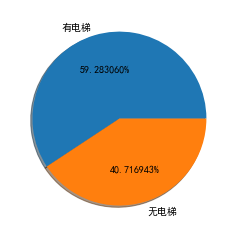

In [66]:
sizes=[len(df[df.Elevator=='有电梯']),len(df[df.Elevator=='无电梯'])]
labels=['有电梯' , '无电梯']
plt.pie(sizes,labels= labels,autopct='%0f%%',shadow=True)
plt.show()

D:\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


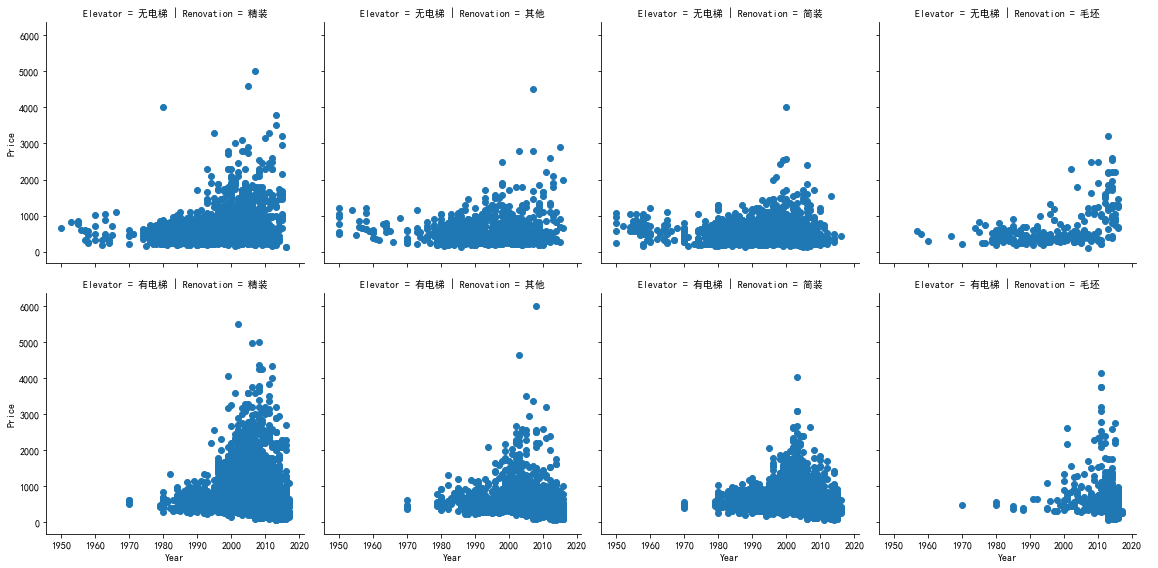

In [67]:
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

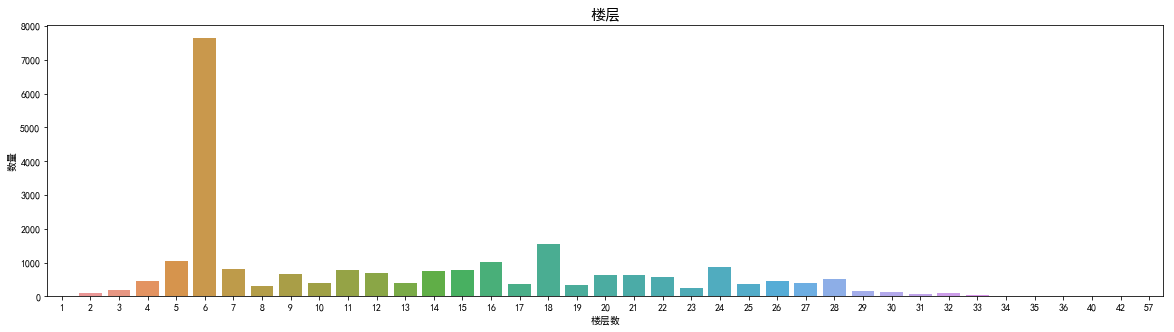

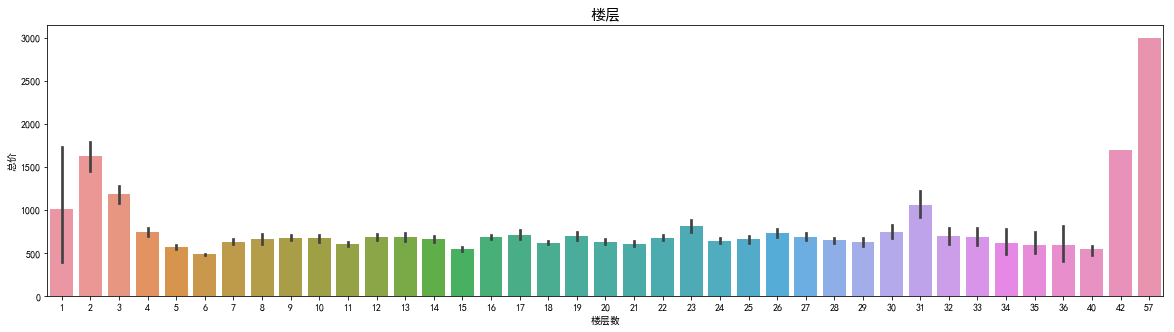

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
18679,朝阳,东大桥,御金台,3室1厅,57,2008,251.0,有电梯,北,精装,11.952191,3000.0


In [68]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('楼层',fontsize=15)
ax1.set_xlabel('楼层数')
ax1.set_ylabel('数量')
f, ax2 = plt.subplots(figsize=(20, 5))
sns.barplot(x='Floor', y='Price', data=df, ax=ax2)
ax2.set_title('楼层',fontsize=15)
ax2.set_xlabel('楼层数')
ax2.set_ylabel('总价')
plt.show()
df.loc[df['Floor']==57]